# Problem Statement
Predict the Burned Area of Forest Fire with Neural Networks.

# Importing Necessary Libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
raw_data = pd.read_csv('forestfires.csv')
raw_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# Exploratory Data Analysis

In [98]:
raw_data['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [99]:
raw_data.shape

(517, 31)

### Descriptive Statistics

In [100]:
raw_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

## Missing Values

In [102]:
raw_data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

###### So we see that there are no missing values.

### Numerical Variables

In [103]:
numerical_features = [feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']
print('Number of numerical variables:', len(numerical_features))
raw_data[numerical_features].head()

Number of numerical variables: 28


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


#### Discrete Feature
    Numerical variables are usually of 2 types                            
    Continuous variable and discrete variable

In [104]:
discrete_feature = [feature for feature in numerical_features if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete_feature)))

Discrete Variables Count: 21


#### Continuous Variable

In [105]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature]
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 7


#### Categorical Variables

In [106]:
categorical = [var for var in raw_data.columns if raw_data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print('The categorical variables are :', categorical)

There are 3 categorical variables
The categorical variables are : ['month', 'day', 'size_category']


### Frequency counts of categorical variables

In [107]:
for var in categorical: 
    print(raw_data[var].value_counts())

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64
small    378
large    139
Name: size_category, dtype: int64


### cardinality

In [108]:
for var in categorical:
    print(var, ' contains ', len(raw_data[var].unique()), ' labels')

month  contains  12  labels
day  contains  7  labels
size_category  contains  2  labels


#### To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

# Data Visualization

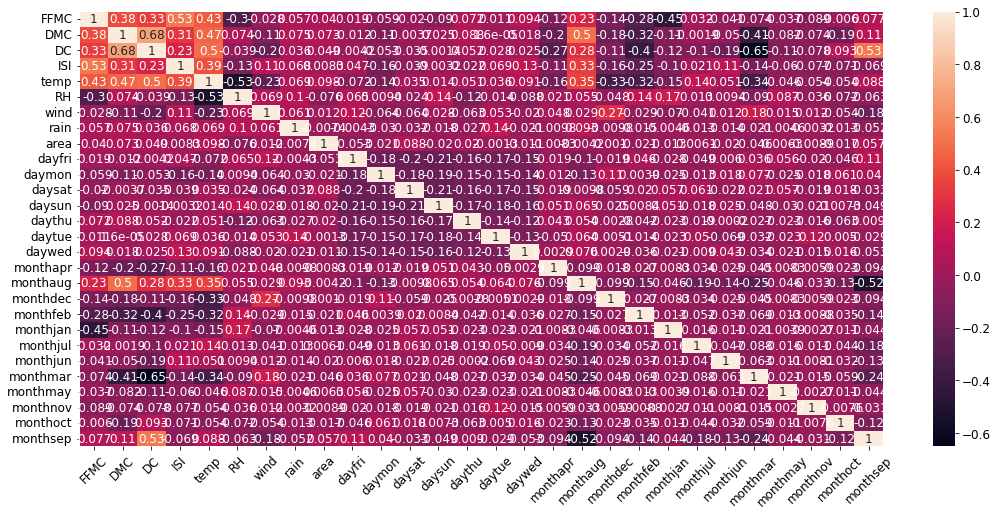

In [109]:
fig= plt.figure(figsize=(18, 8))
sns.heatmap(raw_data.corr(), annot=True);
plt.xticks(rotation=45)
plt.show()

### Univariate plots

C:\Users\BHANUKIRAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


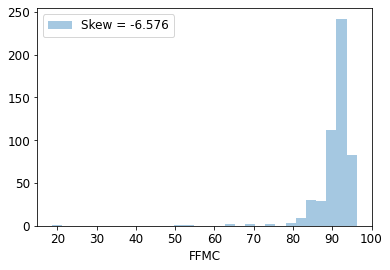

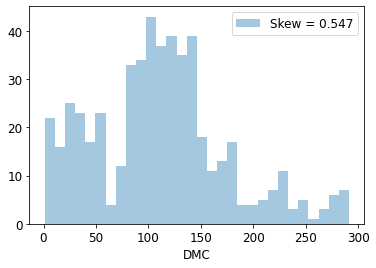

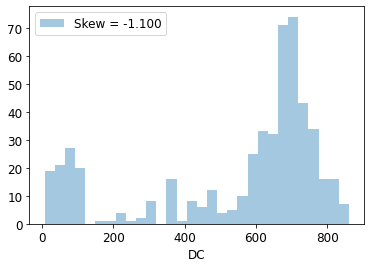

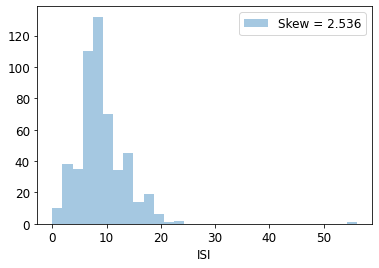

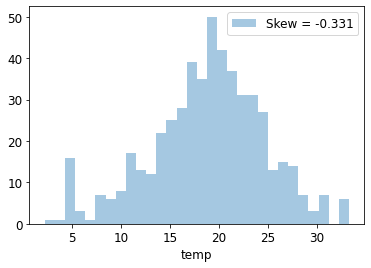

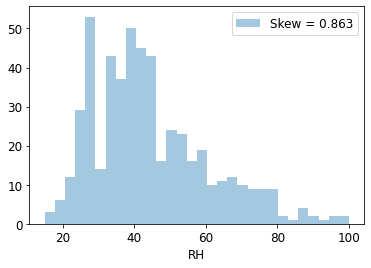

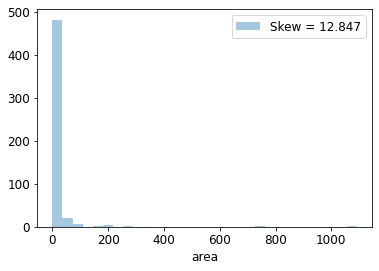

In [110]:
for feat in continuous_feature:
    skew = raw_data[feat].skew()
    sns.distplot(raw_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

### Distribution of 'Forest Fire Area' 

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


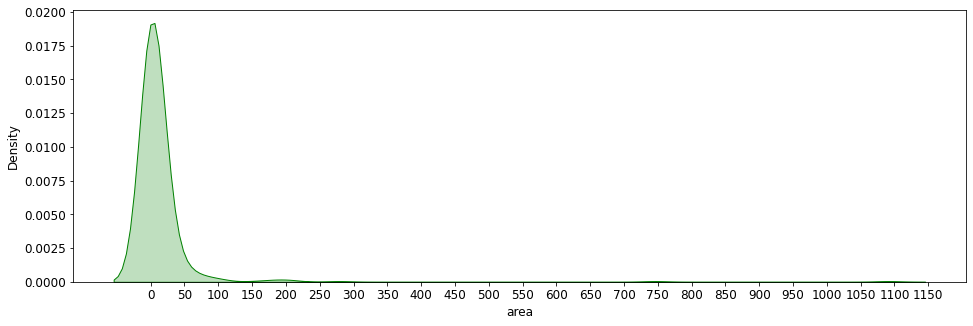

In [111]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(raw_data['area'].skew()))
print("Kurtosis: {}".format(raw_data['area'].kurtosis()))
ax = sns.kdeplot(raw_data['area'], shade = True, color ='g')
plt.xticks([i for i in range(0, 1200, 50)])
plt.show()

#### Few observations:
    The data is highly skewed with a value of +12.84 and huge kurtosis value of 194.                            
    It even tells you that majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.                                      
    We can apply tranformation to fix the skewnesss and kurtosis, however we will have to inverse transform before submitting the output.                                     
    Outlier Check: There are 4 outlier instances in our area columns but the questions is should we drop it or not? (Will get back to this in the outlier treatment step)

### Categorical Variables

In [112]:
categorical_features = [feature for feature in raw_data.columns if raw_data[feature].dtype =='O']
print('Number of Categorical Features:', len(categorical_features), '\n', categorical_features)
raw_data[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


In [113]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(raw_data[feature].unique()), feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


In [114]:
for feature in raw_data.columns:
    if raw_data[feature].dtypes == 'object':
        unique_cat = len(raw_data[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name = feature, unique_cat = unique_cat))
        print(raw_data[feature].value_counts())
        print()

Feature 'month' has 12 unique categories
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Feature 'day' has 7 unique categories
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

Feature 'size_category' has 2 unique categories
small    378
large    139
Name: size_category, dtype: int64



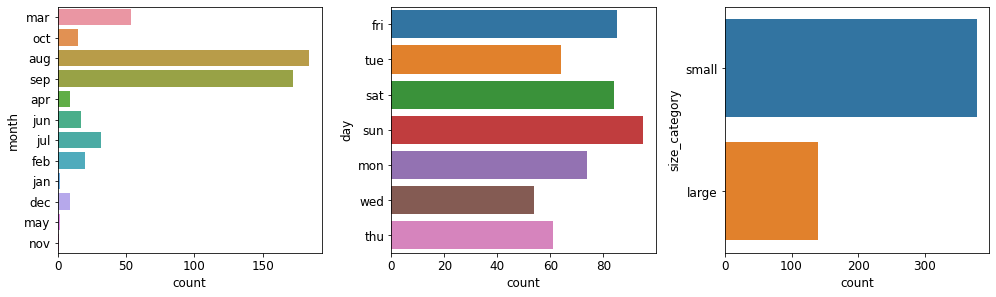

In [115]:
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=raw_data,y=col)
plt.tight_layout()
plt.show()

###### It is interesting to see that abnormally high number of the forest fires occur in the month of August and September.
###### In the case of day, the days from Friday to Monday have higher equal proportion of cases. (However, no strong indicators)May be because of the weekend animal throw some kind of cool party and

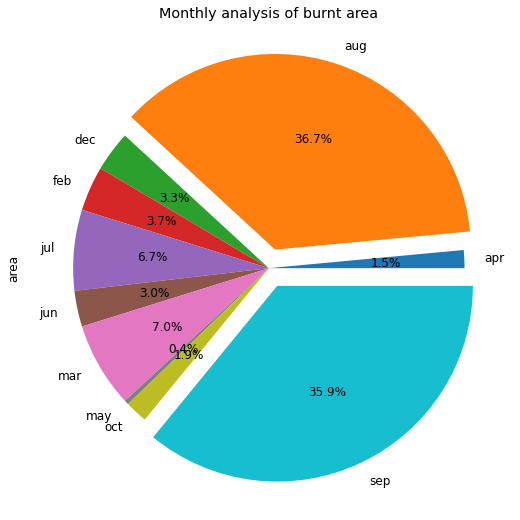

In [116]:
areaburnt=raw_data[raw_data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

#### Observations:
As we can see from the above pie chart,the month of aug and sep have recorded highest % of forest fire i.e 36.8% & 36.1% respectively.                      
Month that recorded least forest fire is may with 0.4%.

In [117]:
raw_data.size_category.unique()

array(['small', 'large'], dtype=object)

#### Checking for Imbalanced or balanced dataset with regards to the Target

In [118]:
countsizesmall = len(raw_data[raw_data.size_category == 'small'])
countsizelarge = len(raw_data[raw_data.size_category == 'large'])
print("Percentage of Small Forest Fire Size: {:.2f}%".format((countsizesmall / (len(raw_data.size_category))*100)))
print("Percentage of Large Foreset Fire Size: {:.2f}%".format((countsizelarge / (len(raw_data.size_category))*100)))

Percentage of Small Forest Fire Size: 73.11%
Percentage of Large Foreset Fire Size: 26.89%


#### Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.
#### Here, the class “small” is called the majority class, and the much smaller in size “large” class is called the minority class.

In [119]:
raw_data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

Text(0.5, 1.0, 'Forest Fire Size Category')

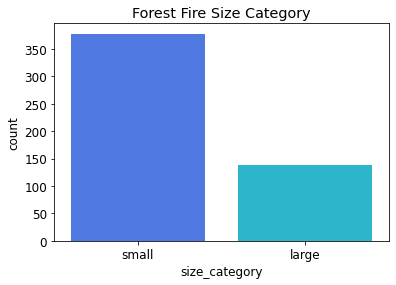

In [120]:
pal = sns.color_palette('rainbow')
sns.countplot(x ='size_category', data = raw_data, palette = pal, order = raw_data['size_category'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Forest Fire Size Category')

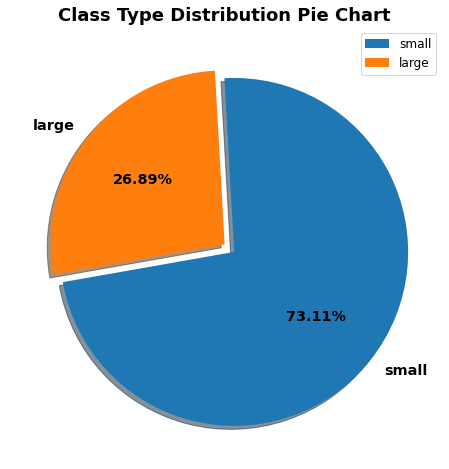

In [121]:
plt.figure(figsize = (12,8))
plt.pie(raw_data['size_category'].value_counts(), labels = raw_data.size_category.unique(), explode = [0.07,0.0],
        autopct = '%.2f%%', shadow = True, startangle = 190,
        textprops = {'size':'large', 'fontweight':'bold', 'rotation':'0', 'color':'black'})
plt.legend(loc = 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

# Data Pre-Processing

In [122]:
continuous_feature = [feature for feature in raw_data.columns if raw_data[feature].dtype !='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 28


In [123]:
raw_data[continuous_feature].head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [124]:
df_standard_scaled = raw_data.copy()
features = df_standard_scaled[continuous_feature]

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,small
1,oct,tue,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081,small
2,oct,sat,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081,small
3,mar,fri,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,...,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,small
4,mar,sun,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,small


### Converting Categorical Variable into Label by using Get Dummies FeatureData Pre-Processing

In [126]:
df_standard_scaled['size_category'] = raw_data.size_category
df_standard_scaled['size_category'] = np.where(df_standard_scaled['size_category'].str.contains("large"), 1, 0)
df_standard_scaled.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,0
1,oct,tue,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081,0
2,oct,sat,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081,0
3,mar,fri,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,...,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,0
4,mar,sun,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,...,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,0


# Feature Selection Technique

In [127]:
raw_data.drop(['month','day','area'] ,axis=1, inplace= True)

In [128]:
data_ = raw_data.copy()
data_.drop('size_category',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,0,0,0,1,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [129]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(raw_data["size_category"])
data_["size_category"] = le.transform(raw_data["size_category"])
data_.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,dayfri,daymon,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,1,0,...,0,0,0,0,0,1,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [130]:
X = data_.drop('size_category', axis = 1)
y =  data_.size_category

In [131]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [132]:
test = SelectKBest(score_func = chi2, k = 4)
fit = test.fit(X, y)

In [133]:
scores = fit.scores_
features = fit.transform(X)

In [134]:
score_df = pd.DataFrame(list(zip(scores, X.columns)), columns = ['Score', 'Feature'])
score_df.sort_values(by ="Score", ascending = False, inplace = True)
score_df

,Score,Feature
1,23.006108,DMC
2,21.872657,DC
17,17.601210,monthdec
5,6.350054,RH
7,5.216072,rain
6,1.440661,wind
16,1.157358,monthaug
12,0.964276,daythu
21,0.738170,monthjun
19,0.735450,monthjan


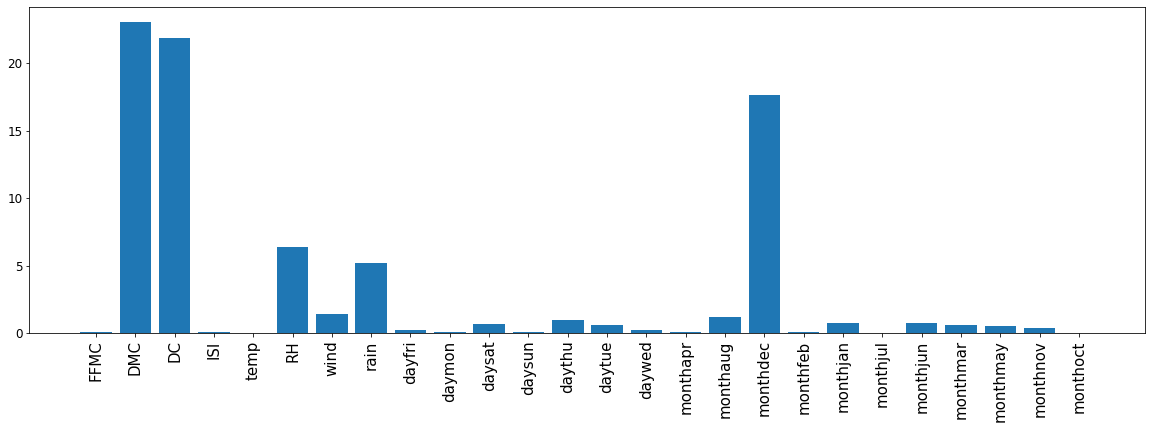

In [135]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks(range(len(scores)))
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

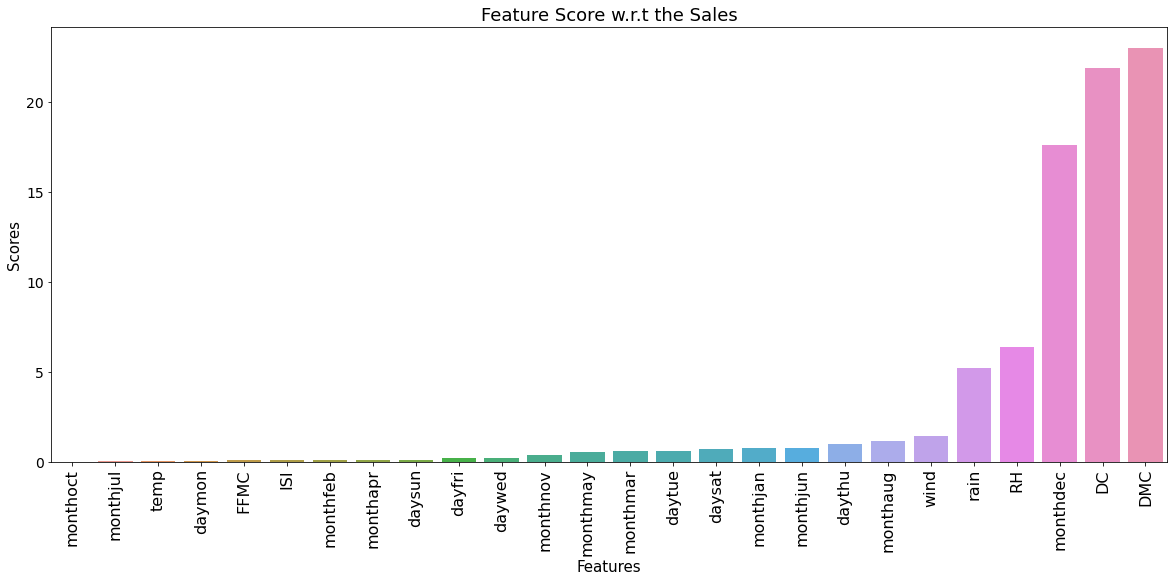

In [136]:
plt.figure(figsize=(20,8))
sns.barplot(x ='Feature', y ="Score", data = score_df, order = score_df.sort_values('Score').Feature)
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [137]:
model_data=data_[['FFMC','DMC','DC','ISI','RH','wind','rain','dayfri','daymon','daysat','daysun','daythu','daytue','daywed',
               'monthapr','monthaug','monthdec','monthfeb','monthjan','monthjun','monthmar','monthmay','monthnov','size_category']]
model_data.head()

,FFMC,DMC,DC,ISI,RH,wind,rain,dayfri,daymon,daysat,...,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjun,monthmar,monthmay,monthnov,size_category
0,86.2,26.2,94.3,5.1,51,6.7,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,90.6,35.4,669.1,6.7,33,0.9,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,90.6,43.7,686.9,6.7,33,1.3,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,91.7,33.3,77.5,9.0,97,4.0,0.2,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,89.3,51.3,102.2,9.6,99,1.8,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


### Test Train Split With Imbalanced Dataset

In [138]:
from sklearn.model_selection import train_test_split
x = model_data.drop('size_category',axis=1)
y = model_data[['size_category']]

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)

# Hyperparameter Tuning
### Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons

In [140]:
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units = hp.Int('units_' + str(i), min_value = 32, max_value = 100, step=32), activation ='relu'))
    model.add(layers.Dense(1, activation ='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                      loss ='binary_crossentropy', metrics = ['accuracy'])
    return model

In [141]:
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(build_model, objective ='val_accuracy', max_trials = 5,  executions_per_trial = 3, directory ='project',
                     project_name ='Forest Fire')

INFO:tensorflow:Reloading Oracle from existing project project\Forest Fire\oracle.json
INFO:tensorflow:Reloading Tuner from project\Forest Fire\tuner0.json


In [142]:
tuner.search_space_summary()

Search space summary
Default search space size: 14
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [143]:
tuner.search(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [144]:
tuner.results_summary()

Results summary
Results in project\Forest Fire
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 6
units_0: 32
learning_rate: 0.0001
units_1: 32
units_2: 32
units_3: 32
units_4: 96
units_5: 32
Score: 0.7307692170143127
Trial summary
Hyperparameters:
num_layers: 6
units_0: 64
learning_rate: 0.001
units_1: 32
units_2: 32
units_3: 64
units_4: 96
units_5: 32
units_6: 64
units_7: 64
units_8: 64
units_9: 64
units_10: 64
units_11: 64
Score: 0.7307692170143127
Trial summary
Hyperparameters:
num_layers: 6
units_0: 64
learning_rate: 0.0001
units_1: 64
units_2: 32
units_3: 32
units_4: 32
units_5: 32
Score: 0.7307692170143127
Trial summary
Hyperparameters:
num_layers: 6
units_0: 64
learning_rate: 0.0001
units_1: 64
units_2: 96
units_3: 64
units_4: 64
units_5: 64
units_6: 64
units_7: 96
units_8: 64
units_9: 96
units_10: 96
units_11: 64
Score: 0.7307692170143127
Trial summary
Hyperparameters:
num_layers: 12
units_0: 64
learning_rate: 0.001
units_1: 96
units_2: 32
units_3: 64
units_4:

### Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

In [145]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV, KFold
from keras.layers import Dense
from keras.optimizers import Adam

def create_model():
    model1 = Sequential()
    model1.add(Dense(64, input_dim = 23, activation ='relu'))
    model1.add(Dense(64, activation ='relu'))
    model1.add(Dense(32, activation ="relu"))
    model1.add(Dense(units=1, activation ="sigmoid"))
    adam = Adam(learning_rate = 0.01)
    model1.compile(loss ='binary_crossentropy', optimizer = adam, metrics=["accuracy"])
    return model1

In [146]:
model1 = KerasClassifier(build_fn = create_model, verbose = 0)
batch_size = [10, 20, 40, 50]
epochs = [10, 50, 100, 200]
param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator = model1, param_grid = param_grid, cv = KFold(), verbose = 10)

C:\Users\BHANUKIRAN\AppData\Local\Temp\ipykernel_14136\129852840.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model1 = KerasClassifier(build_fn = create_model, verbose = 0)


In [147]:
grid_result = grid.fit(x_test, y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.656 total time=   2.0s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=0.581 total time=   2.0s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.581 total time=   2.0s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.677 total time=   2.0s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.419 total time=   2.0s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=50;

[CV 1/5; 11/16] END ..batch_size=40, epochs=100;, score=0.656 total time=   2.8s
[CV 2/5; 11/16] START batch_size=40, epochs=100.................................
[CV 2/5; 11/16] END ..batch_size=40, epochs=100;, score=0.806 total time=   2.8s
[CV 3/5; 11/16] START batch_size=40, epochs=100.................................
[CV 3/5; 11/16] END ..batch_size=40, epochs=100;, score=0.710 total time=   2.7s
[CV 4/5; 11/16] START batch_size=40, epochs=100.................................
[CV 4/5; 11/16] END ..batch_size=40, epochs=100;, score=0.548 total time=   2.7s
[CV 5/5; 11/16] START batch_size=40, epochs=100.................................
[CV 5/5; 11/16] END ..batch_size=40, epochs=100;, score=0.742 total time=   2.8s
[CV 1/5; 12/16] START batch_size=40, epochs=200.................................
[CV 1/5; 12/16] END ..batch_size=40, epochs=200;, score=0.656 total time=   3.9s
[CV 2/5; 12/16] START batch_size=40, epochs=200.................................
[CV 2/5; 12/16] END ..batch_

In [148]:
print('Best {}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("{},{} with {}".format(mean, stdev, param))

Best 0.7368951559066772, using {'batch_size': 20, 'epochs': 200}
0.5828628957271575,0.09063257526243353 with {'batch_size': 10, 'epochs': 10}
0.6860886931419372,0.07643123242066588 with {'batch_size': 10, 'epochs': 50}
0.7306451559066772,0.060263039590169036 with {'batch_size': 10, 'epochs': 100}
0.6925403118133545,0.06817377561961949 with {'batch_size': 10, 'epochs': 200}
0.5264112770557403,0.1779139846355179 with {'batch_size': 20, 'epochs': 10}
0.71794353723526,0.05151357014261743 with {'batch_size': 20, 'epochs': 50}
0.679637098312378,0.06674695567008886 with {'batch_size': 20, 'epochs': 100}
0.7368951559066772,0.06348085925547019 with {'batch_size': 20, 'epochs': 200}
0.6558467626571656,0.15787152332442408 with {'batch_size': 40, 'epochs': 10}
0.6600806474685669,0.14401203427423656 with {'batch_size': 40, 'epochs': 50}
0.6925403237342834,0.08695571470556428 with {'batch_size': 40, 'epochs': 100}
0.6989919185638428,0.07383437335878734 with {'batch_size': 40, 'epochs': 200}
0.550604

### Hyperparameter Tuning: Optimal Droupout rate

In [149]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(64, input_dim = 23, activation ='relu'))
    model2.add(Dense(64, activation ='relu'))
    model2.add(Dense(32, activation ="relu"))
    model2.add(Dense(units = 1, activation ="sigmoid"))
    adam = Adam(learning_rate = 0.01)
    model2.compile(loss ='binary_crossentropy', optimizer = adam, metrics = ["accuracy"])
    return model2

In [150]:
model2 = KerasClassifier(build_fn = create_model, batch_size = 10, epochs = 100, verbose = 0)
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(dropout_rate = dropout_rate)
grid2 = GridSearchCV(estimator = model2, param_grid = param_grid, cv = KFold(), verbose = 10)

C:\Users\BHANUKIRAN\AppData\Local\Temp\ipykernel_14136\568486427.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn = create_model, batch_size = 10, epochs = 100, verbose = 0)


In [151]:
grid_result2 = grid2.fit(x_test, y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END .............dropout_rate=0.0;, score=0.812 total time=   5.0s
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END .............dropout_rate=0.0;, score=0.806 total time=   4.8s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END .............dropout_rate=0.0;, score=0.677 total time=   4.9s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END .............dropout_rate=0.0;, score=0.645 total time=   4.9s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END .............dropout_rate=0.0;, score=0.774 total time=   4.8s
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END .............dropout_rate=0.1;,

In [152]:
print('Best {}, using {}'.format(grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("{},{} with {}".format(mean, stdev, param))

Best 0.7431451559066773, using {'dropout_rate': 0.0}
0.7431451559066773,0.06885132564431386 with {'dropout_rate': 0.0}
0.7181451559066773,0.06786183169251762 with {'dropout_rate': 0.1}
0.71169353723526,0.06681879170823533 with {'dropout_rate': 0.2}
0.71169353723526,0.05291329817993881 with {'dropout_rate': 0.3}
0.7118951559066773,0.07172546723094284 with {'dropout_rate': 0.4}
0.7183467626571656,0.06351158719515905 with {'dropout_rate': 0.5}


### Hyperparameter Tuning: Optimal Activation Function and Kernel Initializer

In [153]:
from keras.layers import Dropout
def create_model(activation_function, init):
    model3 = Sequential()
    model3.add(Dense(64, input_dim = 23, activation ='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(64, activation ='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(32, activation ="relu"))
    model3.add(Dropout(0.0))
    model3.add(Dense(units = 1, activation ="sigmoid"))
    adam = Adam(learning_rate = 0.01)
    model3.compile(loss ='binary_crossentropy', optimizer = adam, metrics = ["accuracy"])
    return model3

In [154]:
model3 = KerasClassifier(build_fn = create_model, batch_size = 10, epochs = 100, verbose = 0)
activation_function = ['softmax','tanh','relu']
init = ['normal','uniform','zero']
param_grid = dict(activation_function = activation_function, init = init)
grid3 = GridSearchCV(estimator = model3, param_grid = param_grid, cv = KFold(), verbose = 10)

C:\Users\BHANUKIRAN\AppData\Local\Temp\ipykernel_14136\2164871837.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model3 = KerasClassifier(build_fn = create_model, batch_size = 10, epochs = 100, verbose = 0)


In [155]:
grid_result3 = grid3.fit(x_test, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=0.750 total time=   5.6s
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=0.806 total time=   4.9s
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=0.710 total time=   5.0s
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=0.613 total time=   4.8s
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=0.774 total time=   4.8s
[CV 1/5; 2/9] START activation_function=softmax, init=uniform..............

In [156]:
print('Best {}, using {}'.format(grid_result3.best_score_, grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("{}, {} with {}".format(mean, stdev, param))

Best 0.7370967626571655, using {'activation_function': 'tanh', 'init': 'zero'}
0.7306451559066772, 0.06681391548919026 with {'activation_function': 'softmax', 'init': 'normal'}
0.7245967626571655, 0.041818995370098234 with {'activation_function': 'softmax', 'init': 'uniform'}
0.6923387050628662, 0.09240471161911347 with {'activation_function': 'softmax', 'init': 'zero'}
0.6860887050628662, 0.10207986257713503 with {'activation_function': 'tanh', 'init': 'normal'}
0.7181451439857482, 0.0502400544779144 with {'activation_function': 'tanh', 'init': 'uniform'}
0.7370967626571655, 0.05577941473702089 with {'activation_function': 'tanh', 'init': 'zero'}
0.7181451559066773, 0.06142282017551142 with {'activation_function': 'relu', 'init': 'normal'}
0.7181451559066773, 0.06142282017551142 with {'activation_function': 'relu', 'init': 'uniform'}
0.7245967745780945, 0.06828222159086911 with {'activation_function': 'relu', 'init': 'zero'}


# Building Neural Networks Model using Optimal Values

In [157]:
def toFindBestParams(x_train, y_train, x_test, y_test):
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            model = Sequential()
            model.add(Dense(units = 50, input_dim = x_train.shape[1], kernel_initializer ='normal', activation ='tanh'))
            model.add(Dense(units = 6, kernel_initializer ='normal', activation ='tanh'))
            model.add(Dense(1, kernel_initializer ='normal', activation ='sigmoid'))
            model.compile(loss ='binary_crossentropy', optimizer ='adam',  metrics = ['accuracy'])
            model_trained = model.fit(x_train, y_train, batch_size = batch_trial, epochs = epochs_trial, verbose = 0)
            Accuracy_train = model_trained.history['accuracy'][-1]
            print('batch_size:', batch_trial, '-', 'epochs:', epochs_trial, 'Accuracy:', Accuracy_train)
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.7313019633293152
batch_size: 5 - epochs: 10 Accuracy: 0.7313019633293152
batch_size: 5 - epochs: 50 Accuracy: 0.7313019633293152
batch_size: 5 - epochs: 100 Accuracy: 0.7368420958518982
batch_size: 10 - epochs: 5 Accuracy: 0.7313019633293152
batch_size: 10 - epochs: 10 Accuracy: 0.7313019633293152
batch_size: 10 - epochs: 50 Accuracy: 0.7313019633293152
batch_size: 10 - epochs: 100 Accuracy: 0.7368420958518982
batch_size: 15 - epochs: 5 Accuracy: 0.7313019633293152
batch_size: 15 - epochs: 10 Accuracy: 0.7313019633293152
batch_size: 15 - epochs: 50 Accuracy: 0.7313019633293152
batch_size: 15 - epochs: 100 Accuracy: 0.7368420958518982
batch_size: 20 - epochs: 5 Accuracy: 0.7313019633293152
batch_size: 20 - epochs: 10 Accuracy: 0.7313019633293152
batch_size: 20 - epochs: 50 Accuracy: 0.7313019633293152
batch_size: 20 - epochs: 100 Accuracy: 0.7396121621131897


#### Training Model - using best params

In [158]:
model = Sequential()
model.add(Dense(units = 64, input_dim = x_train.shape[1], kernel_initializer ='normal', activation ='tanh'))
model.add(Dense(units = 32, kernel_initializer ='normal', activation ='tanh'))
model.add(Dense(1, kernel_initializer ='normal', activation ='relu'))
model.compile(optimizer ='Adam', loss ='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 50)

Epoch 1/50
25/25 [==============================] - 2s 20ms/step - loss: 0.9294 - accuracy: 0.5477 - val_loss: 0.5332 - val_accuracy: 0.7917
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6275 - accuracy: 0.6971 - val_loss: 0.5655 - val_accuracy: 0.7917
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6230 - accuracy: 0.7012 - val_loss: 0.5437 - val_accuracy: 0.7917
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6132 - accuracy: 0.7012 - val_loss: 0.5319 - val_accuracy: 0.7917
Epoch 5/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6089 - accuracy: 0.7012 - val_loss: 0.5292 - val_accuracy: 0.7917
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6075 - accuracy: 0.7012 - val_loss: 0.5219 - val_accuracy: 0.7917
Epoch 7/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6075 - accuracy: 0.7012 - val_loss: 0.5394 - val_accuracy: 0.7917
Epoch 8/50
25/25 [=

### Model Evaluation Train and Test Error

In [159]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.7118
accuracy: 71.18%


In [160]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Compare the train-set and test-set accuracy

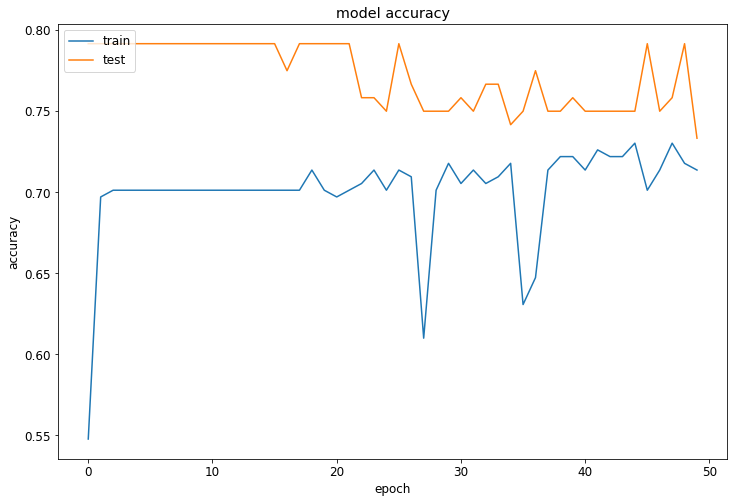

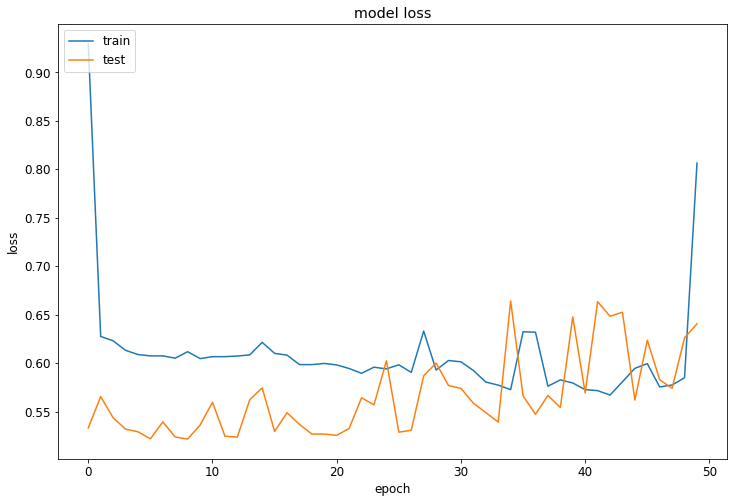

In [161]:
# summarize history for accuracy
plt.figure(figsize = (12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize = (12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###### The training-error converged but the testing error didn't converge and conincide with the training error . Hence, We can do better with Hyperparameter Tuning all the parameters which is computationally Expensive.

### Predicting values from Model using same dataset

In [162]:
y_predict_test = model.predict(x_test)
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test.size_category
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0
    
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

5/5 [==============================] - 0s 3ms/step
(156, 3)


,Test_Actual,Test_Probability,Test_Predicted
259,1,0.572776,1
273,0,0.366997,0
314,1,0.572812,1
78,1,0.572329,1
95,1,0.572320,1
395,0,0.583966,1
408,0,0.571630,1
89,1,0.769678,1
478,1,0.591439,1
426,1,0.572690,1


In [163]:
y_predict_train = model.predict(x_train)
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train.size_category
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

12/12 [==============================] - 0s 3ms/step
(361, 3)


,Train_Actual,Train_Probability,Train_Predicted
346,0,0.572766,1
67,1,0.572012,1
0,1,0.560485,1
493,0,0.570486,1
402,1,0.572150,1
22,1,0.701128,1
205,0,0.572680,1
414,1,0.572522,1
510,1,0.572790,1
54,1,0.572410,1


### Classification Report

In [164]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score for Test Data    = ", np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100,"%")
print("Confusion Matrix for Test Data  =\n", confusion_matrix(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

Accuracy score for Test Data    =  70.0 %
Confusion Matrix for Test Data  =
 [[  6  36]
 [ 11 103]]
Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.35      0.14      0.20        42
           1       0.74      0.90      0.81       114

    accuracy                           0.70       156
   macro avg       0.55      0.52      0.51       156
weighted avg       0.64      0.70      0.65       156



In [165]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy score for Train Data    = ", np.round(accuracy_score(train_prediction['Train_Actual'],train_prediction['Train_Predicted']),2)*100,"%")
print("Confusion Matrix for Train Data  =\n", confusion_matrix(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))
print("Classification Report for Train Data  =\n", classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))

Accuracy score for Train Data    =  72.0 %
Confusion Matrix for Train Data  =
 [[ 15  82]
 [ 20 244]]
Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       0.43      0.15      0.23        97
           1       0.75      0.92      0.83       264

    accuracy                           0.72       361
   macro avg       0.59      0.54      0.53       361
weighted avg       0.66      0.72      0.67       361



In [166]:
y_predict_test = model.predict(x_test) 
y_predict_train = model.predict(x_train)
print('Training set score: {:.2f}%'.format(accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100))

print('Test set score: {:.2f}%'.format(accuracy_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100))

12/12 [==============================] - 0s 2ms/step
Training set score: 71.75%
Test set score: 69.87%


### Confusion matrix

In [167]:
model_data['size_category'].value_counts()

1    378
0    139
Name: size_category, dtype: int64

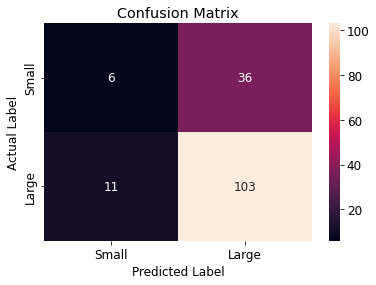

In [168]:
cm_df = confusion_matrix(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
class_label = ["Small", "Large"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()